# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

<!-- 1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=e2f0f5daff9a8b7e44f5633e7a26643a358b6fe84272a374ce08351db1fd5268
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
import json

# Authentication
with open('config.json') as f:
    conf = json.load(f)

apiKey = conf['apiKey']
apiSecret = conf['apiSecret']

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file

kaggle_username = apiKey
kaggle_key = apiSecret

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file


  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 78.9MB/s]


In [6]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00
  Created wheel for sagemaker-scikit-learn-extension: filename=sagemaker_scikit_learn_extension-2.5.0-py3-none-any.whl size=71729 sha256=9bbf1af22c1dbc4b127f1c27977f32840f478b2116e6c6b564057ba69c5838c8
  Stored in directory: /root/.cache/pip/wheels/a1/1c/2f/51b16da68b50341c7db565566e00c359edc8907abacd8a8d5e
Successfully built sagemaker-scikit-learn-extension


In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
# test.datetime = pd.to_datetime(test.datetime)
test.head()
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
# train = train.drop(['casual', 'registered'], axis=1)
predictor = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]}, path='/content').fit(train, time_limit=600, presets='best_quality')

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12602.29 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype

In [13]:
predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.169433      27.909902  514.379297                0.000993           0.241629            3       True         12
1   RandomForestMSE_BAG_L2  -53.452649      19.295259  399.288296                0.713548          44.041091            2       True         11
2          LightGBM_BAG_L2  -55.145016      19.060796  391.108786                0.479085          35.861581            2       True         10
3        LightGBMXT_BAG_L2  -60.518036      26.716276  434.234996                8.134565          78.987791            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.047442    0.033993                0.047442           0.033993            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.049135    1.504381         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.83464098268064,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

In [14]:
predictor.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.169433      27.909902  514.379297                0.000993           0.241629            3       True         12
1   RandomForestMSE_BAG_L2  -53.452649      19.295259  399.288296                0.713548          44.041091            2       True         11
2          LightGBM_BAG_L2  -55.145016      19.060796  391.108786                0.479085          35.861581            2       True         10
3        LightGBMXT_BAG_L2  -60.518036      26.716276  434.234996                8.134565          78.987791            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.047442    0.033993                0.047442           0.033993            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.049135    1.504381                0.001693           1.470388            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.169433,27.909902,514.379297,0.000993,0.241629,3,True,12
1,RandomForestMSE_BAG_L2,-53.452649,19.295259,399.288296,0.713548,44.041091,2,True,11
2,LightGBM_BAG_L2,-55.145016,19.060796,391.108786,0.479085,35.861581,2,True,10
3,LightGBMXT_BAG_L2,-60.518036,26.716276,434.234996,8.134565,78.987791,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,0.047442,0.033993,0.047442,0.033993,1,True,2
5,WeightedEnsemble_L2,-84.125061,0.049135,1.504381,0.001693,1.470388,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,0.045074,0.039663,0.045074,0.039663,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,0.601354,20.475780,0.601354,20.475780,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,0.564826,8.812198,0.564826,8.812198,1,True,7
9,CatBoost_BAG_L1,-130.834641,0.125460,169.896266,0.125460,169.896266,1,True,6


### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    23.020233
1    41.868084
2    45.735874
3    48.986523
4    51.904335
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
description = predictions.describe()
print(description)

count    6493.000000
mean      100.391441
std        89.947510
min         3.110221
25%        19.652794
50%        63.947845
75%       167.990860
max       366.485931
Name: count, dtype: float64


In [17]:
# How many negative values do we have?
negative_values = (predictions < 0).sum()
print(negative_values)

0


In [18]:
# Assuming you have already created the predictions series
predictions = predictions.clip(lower=0)

# Check if there are any negative values after setting them to zero
negative_values = (predictions < 0).sum()
print("Number of negative values after setting them to zero:", negative_values)


Number of negative values after setting them to zero: 0


In [19]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 446kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-25 12:04:35  first raw submission               complete  1.80666      1.80666       
submission_new_hpo.csv       2023-05-25 11:36:09  new features with hyperparameters  complete  0.60962      0.60962       
submission_new_features.csv  2023-05-25 11:02:24  new features                       complete  0.66529      0.66529       
submission.csv               2023-05-25 10:59:00  first raw submission               complete  1.84672      1.84672       


#### Initial score of 1.8066

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

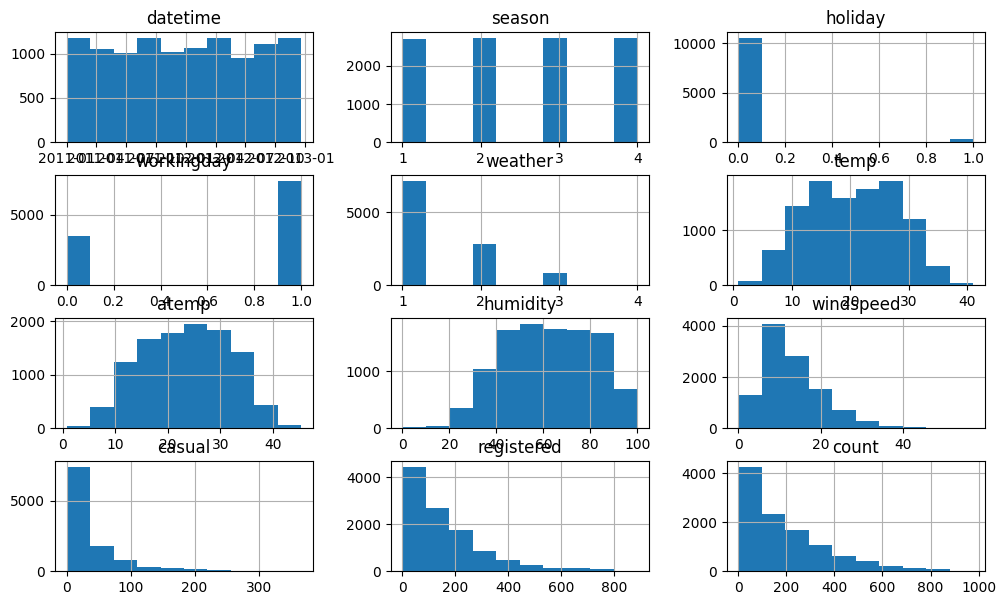

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,7));

In [24]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["season"].astype('category')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   hour        6493 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(4)
memory usage: 419.0 KB


In [27]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


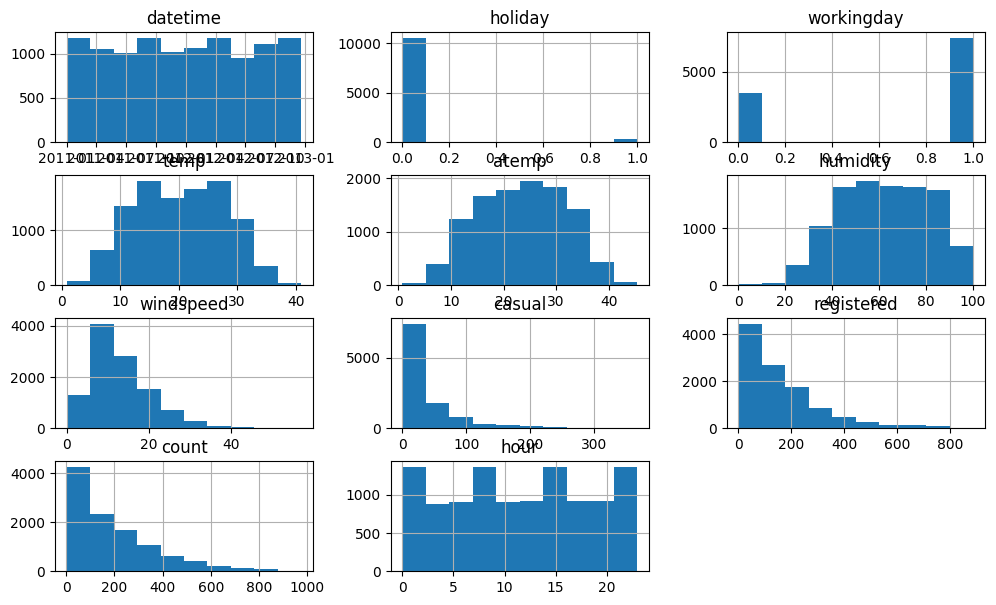

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12,7));

## Step 5: Rerun the model with the same settings as before, just with more features

In [29]:
predictor_new_features = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]}, path='/content').fit(train, time_limit=600, presets='best_quality')

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11701.88 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype

In [30]:
predictor_new_features.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.290642      39.251738  570.655447                0.001444           0.468027            3       True         13
1          LightGBM_BAG_L2  -30.541635      36.460686  420.572132                0.605346          40.469357            2       True         10
2        LightGBMXT_BAG_L2  -31.160341      37.784549  428.190989                1.929209          48.088214            2       True          9
3          CatBoost_BAG_L2  -31.218362      35.982015  434.771885                0.126676          54.669110            2       True         12
4   RandomForestMSE_BAG_L2  -31.819996      36.589062  426.960739                0.733723          46.857964            2       True         11
5      WeightedEnsemble_L2  -32.285976      34.862415  370.102853         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'CatBoost_BAG_L1': -35.27323382597602,
  'ExtraTrees

In [31]:
predictor_new_features.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.290642      39.251738  570.655447                0.001444           0.468027            3       True         13
1          LightGBM_BAG_L2  -30.541635      36.460686  420.572132                0.605346          40.469357            2       True         10
2        LightGBMXT_BAG_L2  -31.160341      37.784549  428.190989                1.929209          48.088214            2       True          9
3          CatBoost_BAG_L2  -31.218362      35.982015  434.771885                0.126676          54.669110            2       True         12
4   RandomForestMSE_BAG_L2  -31.819996      36.589062  426.960739                0.733723          46.857964            2       True         11
5      WeightedEnsemble_L2  -32.285976      34.862415  370.102853                0.001478           0.714397            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-30.290642,39.251738,570.655447,0.001444,0.468027,3,True,13
1,LightGBM_BAG_L2,-30.541635,36.460686,420.572132,0.605346,40.469357,2,True,10
2,LightGBMXT_BAG_L2,-31.160341,37.784549,428.190989,1.929209,48.088214,2,True,9
3,CatBoost_BAG_L2,-31.218362,35.982015,434.771885,0.126676,54.669110,2,True,12
4,RandomForestMSE_BAG_L2,-31.819996,36.589062,426.960739,0.733723,46.857964,2,True,11
5,WeightedEnsemble_L2,-32.285976,34.862415,370.102853,0.001478,0.714397,2,True,8
6,LightGBM_BAG_L1,-33.919639,6.410469,62.379706,6.410469,62.379706,1,True,4
7,LightGBMXT_BAG_L1,-34.457274,27.226544,143.339741,27.226544,143.339741,1,True,3
8,CatBoost_BAG_L1,-35.273234,0.166289,144.509396,0.166289,144.509396,1,True,6
9,ExtraTreesMSE_BAG_L1,-38.326129,0.918819,10.655164,0.918819,10.655164,1,True,7


In [44]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = predictions_new_features.clip(lower=0)

In [45]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [46]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 431kB/s]
Successfully submitted to Bike Sharing Demand

In [47]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-25 12:34:55  new features                       complete  0.55382      0.55382       
submission_new_hpo.csv       2023-05-25 12:25:28  new features with hyperparameters  complete  0.62473      0.62473       
submission_new_features.csv  2023-05-25 12:16:53  new features                       complete  0.67701      0.67701       
submission.csv               2023-05-25 12:04:35  first raw submission               complete  1.80666      1.80666       


#### New Score of 0.67701

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [36]:
# hyperparameters for the individual models within AutoGluon
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'

hyperparameters ={'GBM': {'learning_rate': 0.1}}
hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo =  TabularPredictor(label='count', problem_type='regression',
                                      eval_metric='root_mean_squared_error', 
                                      learner_kwargs={"ignored_columns": ["casual", "registered"]}, 
                                      path='/content').fit(train, time_limit=600, 
                                                           presets='best_quality',
                                                           hyperparameters=hyperparameters, 
                                                           hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11845.05 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.8604	 = Validation score   (-root_mean_squared_error)
	50.51s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-34.3479	 = Validation score   (-root_mean_squared_error)
	54.79s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-33.9692	 = Validation score   (-root_mean_squared_error)
	56.59s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-34.0043	 = Validation score   (-root_mean_squared_error)
	51.64s	 = T

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2/T1 ...
	-33.6837	 = Validation score   (-root_mean_squared_error)
	39.79s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-33.7301	 = Validation score   (-root_mean_squared_error)
	45.28s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-33.7322	 = Validation score   (-root_mean_squared_error)
	34.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-33.6805	 = Validation score   (-root_mean_squared_error)
	42.49s	 = T

In [55]:
predictor_new_hpo.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -32.927537       0.002341  266.684490                0.001423           0.408566            2       True          6
1   WeightedEnsemble_L3 -33.471997       0.002500  428.635766                0.000906           0.371145            3       True         12
2    LightGBM_BAG_L2/T5 -33.548467       0.001070  306.405430                0.000151          40.129506            2       True         11
3    LightGBM_BAG_L2/T4 -33.680516       0.001110  308.762279                0.000191          42.486355            2       True         10
4    LightGBM_BAG_L2/T1 -33.683667       0.001131  306.070689                0.000213          39.794765            2       True          7
5    LightGBM_BAG_L2/T2 -33.730111       0.001096  311.559752                0.000178          45.

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -33.86041700651912,
  'LightGBM_BAG_L1/T2': -34.347886183919485,
  'LightGBM_BAG_L1/T3': -33.9692016647787,
  'LightGBM_BAG_L1/T4': -34.00431658522958,
  'LightGBM_BAG_L1/T5': -34.097571125841455,
  'WeightedEnsemble_L2': -32.927537483003,
  'LightGBM_BAG_L2/T1': -33.68366738127524,
  'LightGBM_BAG_L2/T2': -33.7301110

In [54]:
predictor_new_hpo.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -32.927537       0.002341  266.684490                0.001423           0.408566            2       True          6
1   WeightedEnsemble_L3 -33.471997       0.002500  428.635766                0.000906           0.371145            3       True         12
2    LightGBM_BAG_L2/T5 -33.548467       0.001070  306.405430                0.000151          40.129506            2       True         11
3    LightGBM_BAG_L2/T4 -33.680516       0.001110  308.762279                0.000191          42.486355            2       True         10
4    LightGBM_BAG_L2/T1 -33.683667       0.001131  306.070689                0.000213          39.794765            2       True          7
5    LightGBM_BAG_L2/T2 -33.730111       0.001096  311.559752                0.000178          45.283827            2       True          8
6    LightGBM_BAG_L2

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.927537,0.002341,266.684490,0.001423,0.408566,2,True,6
1,WeightedEnsemble_L3,-33.471997,0.002500,428.635766,0.000906,0.371145,3,True,12
2,LightGBM_BAG_L2/T5,-33.548467,0.001070,306.405430,0.000151,40.129506,2,True,11
3,LightGBM_BAG_L2/T4,-33.680516,0.001110,308.762279,0.000191,42.486355,2,True,10
4,LightGBM_BAG_L2/T1,-33.683667,0.001131,306.070689,0.000213,39.794765,2,True,7
5,LightGBM_BAG_L2/T2,-33.730111,0.001096,311.559752,0.000178,45.283827,2,True,8
6,LightGBM_BAG_L2/T3,-33.732198,0.001073,300.364934,0.000155,34.089010,2,True,9
7,LightGBM_BAG_L1/T1,-33.860417,0.000219,50.508898,0.000219,50.508898,1,True,1
8,LightGBM_BAG_L1/T3,-33.969202,0.000173,56.587854,0.000173,56.587854,1,True,3
9,LightGBM_BAG_L1/T4,-34.004317,0.000160,51.636243,0.000160,51.636243,1,True,4


In [48]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

In [49]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 187k/187k [00:00<00:00, 364kB/s]
Successfully submitted to Bike Sharing Demand

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-25 12:36:41  new features with hyperparameters  complete  0.62473      0.62473       
submission_new_features.csv  2023-05-25 12:34:55  new features                       complete  0.55382      0.55382       
submission_new_hpo.csv       2023-05-25 12:25:28  new features with hyperparameters  complete  0.62473      0.62473       
submission_new_features.csv  2023-05-25 12:16:53  new features                       complete  0.67701      0.67701       


#### New Score of 0.62473

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

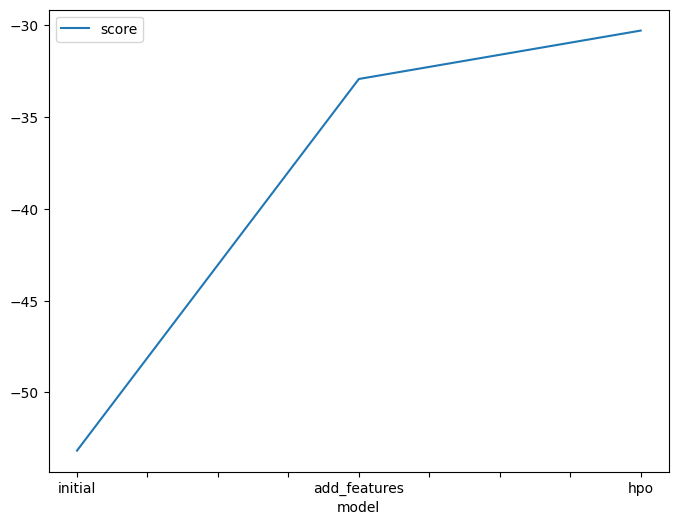

In [56]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.169433 , -32.927537, -30.290642]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

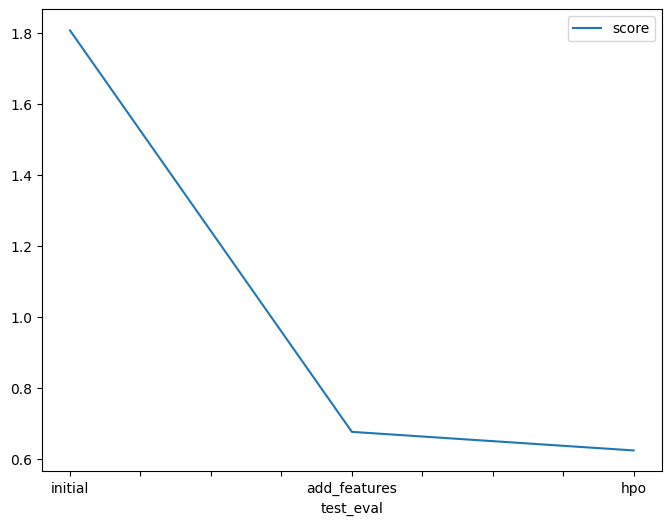

In [53]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.8066 , 0.67701, 0.62473]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default values', 'default values', "GBM: {'learning_rate': 0.1}"],
    "hpo2": ['default values', 'default values', 'default values'],
    "hpo3": ['default values', 'default values', 'default values'],
    "score": [1.8066 , 0.67701, 0.62473]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default values,default values,default values,1.80660
1,add_features,default values,default values,default values,0.67701
2,hpo,GBM: {'learning_rate': 0.1},default values,default values,0.62473
